1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5000 - loss: 0.3470
Accuracy: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predictions:
Input: [0 0] => Predicted Output: [0], Actual Output: [0]
Input: [0 1] => Predicted Output: [1], Actual Output: [1]
Input: [1 0] => Predicted Output: [0], Actual Output: [1]
Input: [1 1] => Predicted Output: [1], Actual Output: [0]


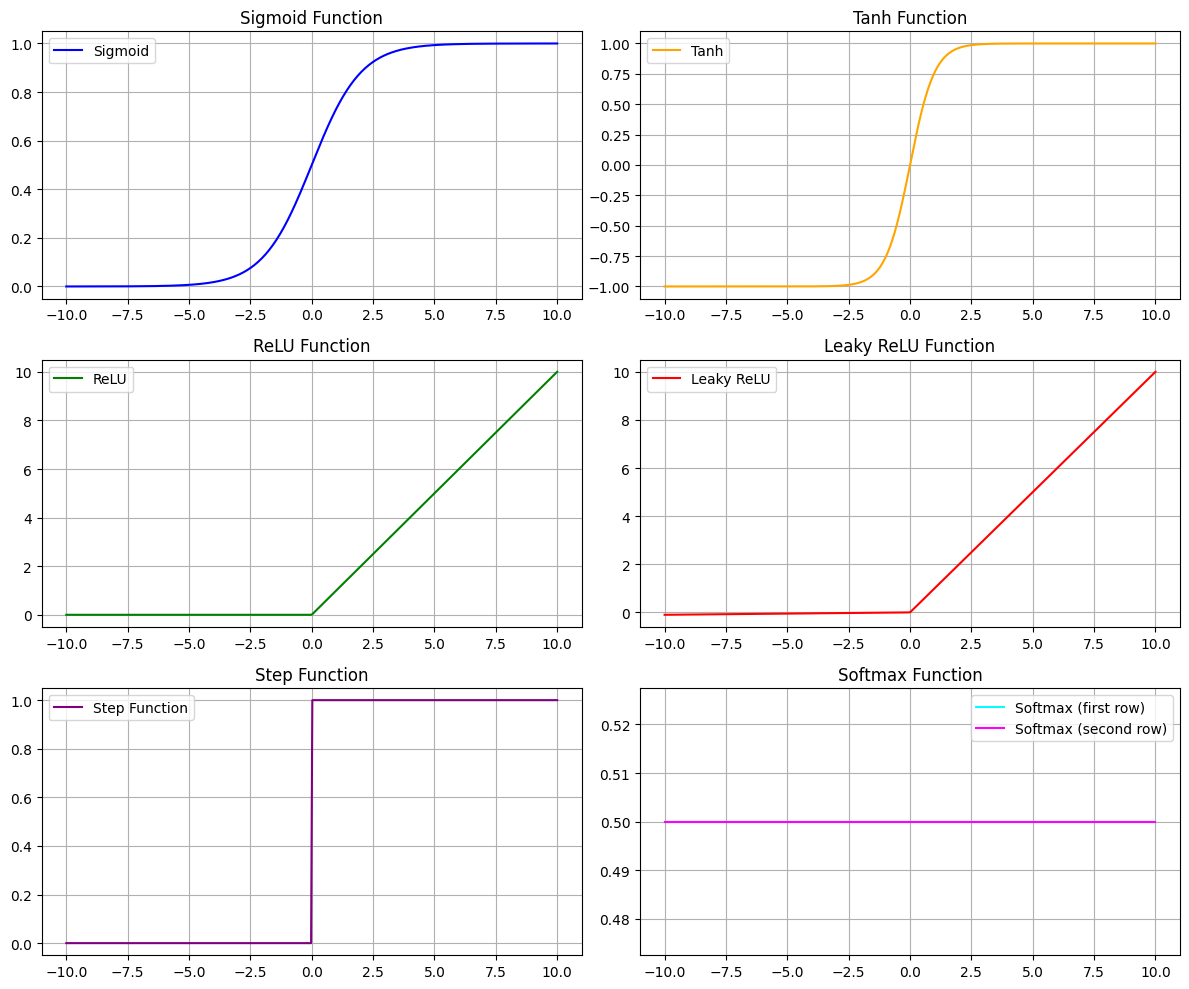

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

model = Sequential()
model.add(Dense(2, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=10000, verbose=0)

_, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

predictions = model.predict(X)
predictions = np.round(predictions).astype(int)

print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} => Predicted Output: {predictions[i]}, Actual Output: {y[i]}")


import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def step_function(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

x = np.linspace(-10, 10, 400)

sigmoid_vals = sigmoid(x)
tanh_vals = tanh(x)
relu_vals = relu(x)
leaky_relu_vals = leaky_relu(x)
step_vals = step_function(x)

softmax_vals = softmax(np.vstack([x, x]))

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(x, sigmoid_vals, label='Sigmoid', color='blue')
plt.title('Sigmoid Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x, tanh_vals, label='Tanh', color='orange')
plt.title('Tanh Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x, relu_vals, label='ReLU', color='green')
plt.title('ReLU Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x, leaky_relu_vals, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x, step_vals, label='Step Function', color='purple')
plt.title('Step Function')
plt.grid()
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x, softmax_vals[0], label='Softmax (first row)', color='cyan')
plt.plot(x, softmax_vals[1], label='Softmax (second row)', color='magenta')
plt.title('Softmax Function')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
